# Evaluate the inverse design with fragment prompts

In [2]:
from glob import glob 
from fastcore.helpers import load_pickle, save_pickle
import matplotlib.pyplot as plt 
plt.style.use(['science', 'nature'])
import numpy as np 
import pandas as pd 
import time

In [3]:
def prevalence(df, fragment, target, window=0.1):
    subset = df[df['GFN']]    
    return df["smiles"].apply(lambda x: fragment in x).sum() / len(df)


The main plot is probably the found ratio / prevalence as a function of the temperature for different functional groups.

In [4]:
all_res = glob('/Users/kevinmaikjablonka/git/kjappelbaum/gpt3forchem/experiments/results/20221206_generate_with_fragment/*.pkl')

In [5]:
load_pickle(all_res[0])['analysis'][0]['smiles']

{'[H]OC([H])([H])[C@]1([H])N([H])[C@@]([H])(C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])[H])C([H])([H])[C@]1([H])O[H]'}

In [6]:
cres = []

for r in all_res: 
    res = load_pickle(r)
    if res['analysis'] and res['analysis'][0]['p_value']:
        for ri in res['analysis']:
            cres.append(
                {'fragment': res['fragment'],
                'fragment_in_smiles': ri['fragment_in_smiles']/res['prevalence'],
                'p_value': ri['p_value'] ,
                'temperatures': ri['temperature'],
            })

        # timestr = time.strftime("%Y%m%d-%H%M%S")
        # for a in res['analysis']:
        #     with open(f'generate_w_fragment_for_xtb/{timestr}_{res["fragment"]}_{a["temperature"]}.txt', 'w') as f:
        #         for smile in a['smiles']:
        #             f.write(smile + '\n')

In [7]:
cres = pd.DataFrame(cres)

In [8]:
fragment_data = cres.groupby(['fragment', 'temperatures']).agg(['mean', 'std'])

In [9]:
fragment_data.loc['Br']

fragment_in_smiles                 p_value              
                           mean       std          mean           std
temperatures                                                         
0.00                   0.000000  0.000000           NaN           NaN
0.05                   0.923252  0.100437  1.000000e+00  0.000000e+00
0.15                   0.581803  0.134308  1.575467e-01  1.426355e-01
0.25                   0.804954  0.023273  2.677088e-01  4.617932e-02
0.50                   0.861911  0.152276  3.581441e-01  3.958070e-01
0.75                   1.229078  0.203067  2.205109e-01  2.259678e-01
1.00                   1.965711  0.325434  1.133454e-09  1.800655e-09
1.25                   3.044836  0.339206  3.665672e-33  4.946217e-33
1.50                   3.215319  0.142031  5.082869e-13  7.734111e-13

In [10]:
cres['fragment'].unique()

array(['C(=O)', 'C#C', 'Br', 'F', 'CO', 'C#CC', 'Cl', 'I', 'C#CBr'],
      dtype=object)

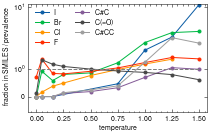

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
for label, fragment in [('I', 'I'), ('Br', 'Br'), ('Cl', 'Cl'), ('F', 'F'), (r'C\#C', 'C#C'), ('C(=O)', 'C(=O)'), (r'C\#CC', 'C#CC')]:
    data = fragment_data.loc[fragment]
    ax.plot(data.index, data['fragment_in_smiles']['mean'], label=label, marker='o')
plt.xlabel('temperature')
plt.ylabel('fraction in SMILES / prevalence')
plt.hlines(1, 0, 1.5, linestyle='--', color='grey')
plt.legend(ncol=2)
plt.tight_layout()
plt.yscale('symlog')
plt.savefig('20221206_fragment_in_smiles.pdf', bbox_inches='tight')

In [16]:
fragment_data.loc['C#CBr']

fragment_in_smiles            p_value    
                           mean        std    mean std
temperatures                                          
0.00                   0.000000   0.000000     NaN NaN
0.05                   0.000000   0.000000     NaN NaN
0.15                   0.000000   0.000000     NaN NaN
0.25                   0.000000   0.000000     NaN NaN
0.50                   0.000000   0.000000     NaN NaN
0.75                   0.000000   0.000000     NaN NaN
1.00                   0.000000        NaN     NaN NaN
1.25                  39.519604  68.449963     0.0 NaN
1.50                   0.000000   0.000000     NaN NaN